<a href="https://colab.research.google.com/github/mlacasa/Probabilidad/blob/main/IntervaloConfianza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CÁLCULO DE UN INTERVALO DE CONFIANZA PARA VARIABLES NUMÉRICAS CONOCIDA LA DESVIACIÓN TÍPICA POBLACIONAL

1. Definición de términos:\
**Media muestral** : $\bar{x}$ Promedio de los datos de la muestra. Es la media que calculamos con la serie dada.\
**Desviación típica poblacional** $\sigma$: Medida de dispersión poblacional conocida. Viene dado, no hay que calcular.\
Tamaño de la muestra **n** : Número de observaciones en la muestra.\
**Nivel de confianza** : Porcentaje que indica qué tan seguro estamos de que el intervalo contiene la media poblacional (por ejemplo, 95% o 99%).
2. **Determinación del valor crítico:**\
Debido a que conocemos la desviación típica poblacional, utilizamos la distribución normal (z). Para un nivel de confianza del 95%, el valor crítico es aproximadamente ( z = 1.96 ) (puedes encontrar esto en tablas Z o calculadoras estadísticas).
3. Fórmula del intervalo de confianza:
$$IC = \bar{x} \pm z \cdot \left( \frac{\sigma}{\sqrt{n}} \right)$$

4. Pasos para el cálculo:
**Obtener la media muestral** (si hay que calcular se denotará por $\bar{x}$ y si se trata de media poblacional se denota por $\mu$ :\
 Sumar todos los valores de la muestra y dividir por ( n ).\


Calcular la desviación estándar de la media  Divide la desviación típica poblacional  por la raíz cuadrada del tamaño de la muestra (( n )).
Identificar el valor crítico (( z )): Según el nivel de confianza deseado.
Calcular el margen de error (ME): Multiplica el valor crítico ( z ) por la desviación estándar de la media.
Construir el intervalo de confianza: Sumar y restar el margen de error de la media muestral para obtener los límites inferior y superior del intervalo.

EJEMPLO EN Python

In [1]:
import numpy as np
import scipy.stats as stats

# Definimos los parámetros, mismo ejemplo que en el foro.
mu = 100  # Media poblacional
sigma = 15  # Desviación típica poblacional
n = 40  # Tamaño de la muestra
confidence_level = 0.95  # Nivel de confianza

# Cálculo del valor crítico (z), se evalúa el valor z y si (0.95+1)/2 = 0.975, ver gráfico inferior para entender este dato.
z = stats.norm.ppf((1 + confidence_level) / 2)

# Cálculo de la desviación estándar de la media (SEM)
sem = sigma / np.sqrt(n)

# Cálculo del margen de error
margin_of_error = z * sem

# Cálculo del intervalo de confianza
lower_limit = mu - margin_of_error
upper_limit = mu + margin_of_error

# Mostrar resultados
print(f"Intervalo de confianza al {confidence_level * 100}%: ({lower_limit:.2f}, {upper_limit:.2f})")

Intervalo de confianza al 95.0%: (95.35, 104.65)


## Explicación gráfica

A continuación se dibuja el área para una z = 1.96, esto quiere decir que será la probabilidad que un valor sea mayor que $2 * \sigma + \mu$.
$P(X > 2 * \sigma + \mu) = 2.5\%$

Veámoslo gráficamente

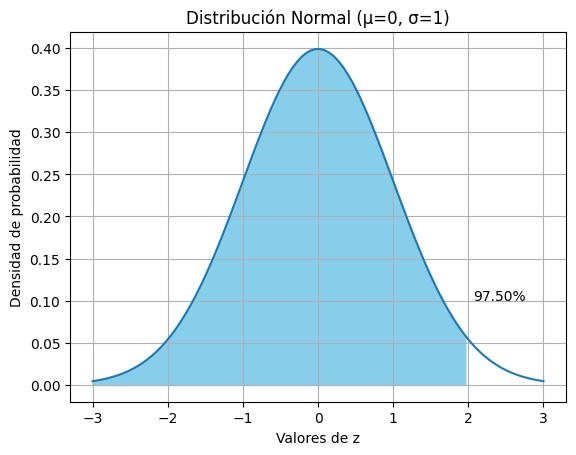

In [10]:

import matplotlib.pyplot as plt # librería para gráficos
from scipy.stats import norm

# Parámetros de la distribución normal
mu = 0
sigma = 1

# Rango de valores del eje X (3 veces la desviación típo se considera el 99% de todos los valores)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Función de densidad de probabilidad
y = norm.pdf(x, mu, sigma)

# Gráfica de la distribución normal
plt.plot(x, y)

# Valor z para sombrear el área
z = 1.96

# Calculamos la probabilidad acumulada hasta z ( el área en azul )
p = norm.cdf(z)

# Sombreamos el área bajo la curva hasta z
x_fill = np.linspace(mu - 3*sigma, z, 100)
y_fill = norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='skyblue')

# Añadimos etiquetas y título a la gráfica
plt.title('Distribución Normal (μ=0, σ=1) para una z = 1.96')
plt.xlabel('Valores de z')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)

# Indicamos el porcentaje de área coloreada
plt.text(z + 0.1, 0.1, f'{p*100:.2f}%', fontsize=10)  # Ajusta la posición del texto según sea necesario

# Mostramos la gráfica
plt.show()

## Mismo cáclulo para una z = -1.96

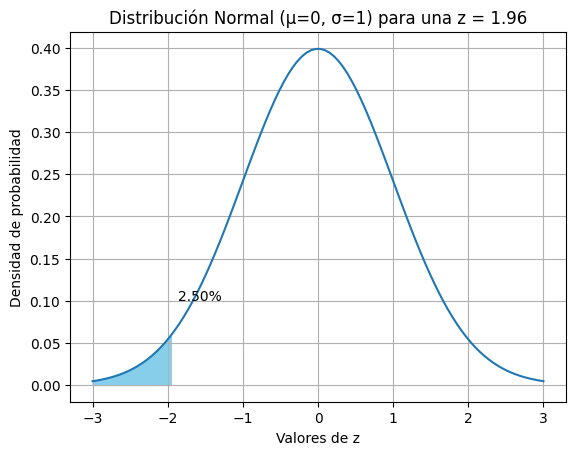

In [13]:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)
plt.plot(x, y)
#
z = -1.96
p = norm.cdf(z)
# Sombreamos el área bajo la curva hasta z
x_fill = np.linspace(mu - 3*sigma, z, 100)
y_fill = norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='skyblue')
# Añadimos etiquetas y título a la gráfica
plt.title('Distribución Normal (μ=0, σ=1) para una z = -1.96')
plt.xlabel('Valores de z')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)

# Indicamos el porcentaje de área coloreada
plt.text(z + 0.1, 0.1, f'{p*100:.2f}%', fontsize=10)  # Ajusta la posición del texto según sea necesario

# Mostramos la gráfica
plt.show()

## Intervalo de Confianza de Dos Colas
Definición:

Un intervalo de confianza de dos colas es el rango en el cual se espera que se encuentre la media poblacional con un nivel de confianza determinado, considerando ambos extremos (colas) de la distribución. Suele ser del 95%, y esto es la $P(X \in [-z, z] = 0.95)$, y para este cálculo del área, z = 1.96.


Cálculo:

Se utiliza el valor crítico ( z ) que corresponde a la probabilidad dividida entre dos en cada cola de la distribución. Por ejemplo, para un nivel de confianza del 95%, estaríamos interesados en el 2.5% en cada cola, lo que se traduce en un valor crítico que corresponde a un percentil del 97.5% para una distribución normal estándar.

La fórmula del intervalo de confianza es:
$$
IC = \bar{x} \pm z \cdot \left( \frac{\sigma}{\sqrt{n}} \right)
$$

Ejemplo:

Si tienes un nivel de confianza del 95%, se utilizan valores críticos que capturan el 95% de la distribución central, dejando el 5% restante (2.5% en cada cola).

## Intervalo de Confianza de Una Cola
Definición:

Un intervalo de confianza de una cola se usa para evaluar la probabilidad de que un parámetro poblacional esté por encima o por debajo de un cierto valor. Esto es útil en situaciones donde el interés no está en ambas direcciones, sino solamente en una (por ejemplo, cuando se quiere demostrar que un nuevo tratamiento es mejor que el estándar).

Cálculo:

En este caso, se utiliza un único valor crítico ( z ) que corresponde al nivel de confianza deseado en una cola de la distribución. Por ejemplo, para un nivel de confianza del 95% en una cola, el 5% estaría en la cola superior (o inferior).

Ejemplo:

Con un nivel de confianza del 95% en una cola superior, usarías el valor crítico que captura el 95% de la distribución (es decir, el percentil del 95%).
Resumen de Diferencias

Dirección:

Dos Colas: Considera ambos extremos de la distribución.
Una Cola: Solo considera un extremo (superior o inferior).

Valor Crítico:

Dos Colas: Se divide el nivel de significancia por 2, considerando así las áreas en ambas colas.\
Una Cola: Usa directamente el nivel de significancia para obtener el valor crítico de una sola cola.
Interpretación:

Dos Colas: Proporciona un rango donde se espera que se encuentre el parámetro poblacional.\
Una Cola: Proporciona una prueba unilateral; busca determinar si el parámetro está por encima o por debajo de un valor determinado.\

Ejemplo para 1 cola en Phython

In [18]:
# Definimos los parámetros
mu = 100  # Media poblacional conocida
sigma = 15  # Desviación típica poblacional conocida
n = 40  # Tamaño de la muestra
confidence_level = 0.95  # Nivel de confianza

# Cálculo del valor crítico (z) para una cola, fijarse en la diferencia.
z = stats.norm.ppf(confidence_level)

# Cálculo de la desviación estándar de la media (SEM)
sem = sigma / np.sqrt(n)

# Cálculo del margen de error
margin_of_error = z * sem

# Cálculo del límite superior del intervalo de confianza
upper_limit = mu + margin_of_error

# Mostrar resultado
print ('El valor crítico es: ',z)
print(f"Límite superior del intervalo de confianza de una cola al {confidence_level * 100}%: {upper_limit:.2f}")

El valor crítico es:  1.6448536269514722
Límite superior del intervalo de confianza de una cola al 95.0%: 103.90


Fijarse que z ha cambiado de 1.96 a 1.64

Dibujemos esto

In [23]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt # librería para gráficos
from scipy.stats import norm

# Ahora creo una función que será más fácil.

def plot_z_distribution(z_value):
    # Parámetros de la distribución normal
    mu = 0
    sigma = 1

    # Rango de valores del eje X
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

    # Función de densidad de probabilidad
    y = norm.pdf(x, mu, sigma)

    # Gráfica de la distribución normal
    plt.plot(x, y)

    # Calculamos la probabilidad acumulada hasta z
    p = norm.cdf(z_value)

    # Sombreamos el área bajo la curva hasta z
    x_fill = np.linspace(mu - 3*sigma, z_value, 100)
    y_fill = norm.pdf(x_fill, mu, sigma)
    plt.fill_between(x_fill, y_fill, color='skyblue')

    # Añadimos etiquetas y título a la gráfica
    plt.title(f'Distribución Normal (μ=0, σ=1) para una z = {z_value}')
    plt.xlabel('Valores de z')
    plt.ylabel('Densidad de probabilidad')
    plt.grid(True)

    # Indicamos el porcentaje de área coloreada
    plt.text(z_value + 0.1, 0.1, f'{p*100:.2f}%', fontsize=10)

    # Mostramos la gráfica
    plt.show()




Ahora podemos probar con distintos valores de confianza, para una cola.

Esto significa que calculamos un valor z para que:

$$P(X > z ) = 1- confidence_level

El nivel de confianza suele denotarse como $(\alpha = 0.05)$

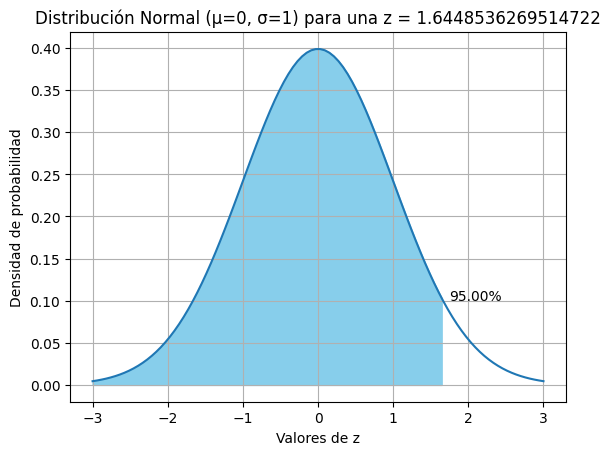

In [24]:
# Ejemplo de uso
confidence_level = 0.95                   #
z = stats.norm.ppf(confidence_level)
plot_z_distribution(z)